In [1]:
import h5py
import os
import numpy as np
import pandas as pd
import anndata as ad
def intersect(lst1, lst2): 
    """
    param: lst1 - list
    param: lst2 - list
    
    return: list of common elements
    """

    temp = set(lst2)
    lst3 = [value for value in lst1 if value in temp]
    return lst3 
filenames = []
for (dirpath, dirnames, filename) in os.walk('Data/'):
    for file in filename:
        filenames.append(os.path.join(dirpath,file))
slice1 = ad.read_h5ad(filenames[0])
slice2 = ad.read_h5ad(filenames[2])

interIndex = intersect(slice1.var.index,slice2.var.index)
slice1 = slice1[:,interIndex]
slice2 = slice2[:,interIndex]
slice1.X,slice2.X,len(slice1.obsm['spatial'])
np.squeeze(np.array(slice1.X.todense()[:,0]))
toarray = lambda x: np.array(x,dtype=np.int16)
toembedding = lambda x: np.squeeze(x)
ann2embd = lambda ann,index: toembedding(toarray(ann.X[:,index].todense()))
ann2feaMat = lambda ann: toembedding(toarray(ann.X.todense()))
ann2feaMat(slice1).shape

(4593, 10032)

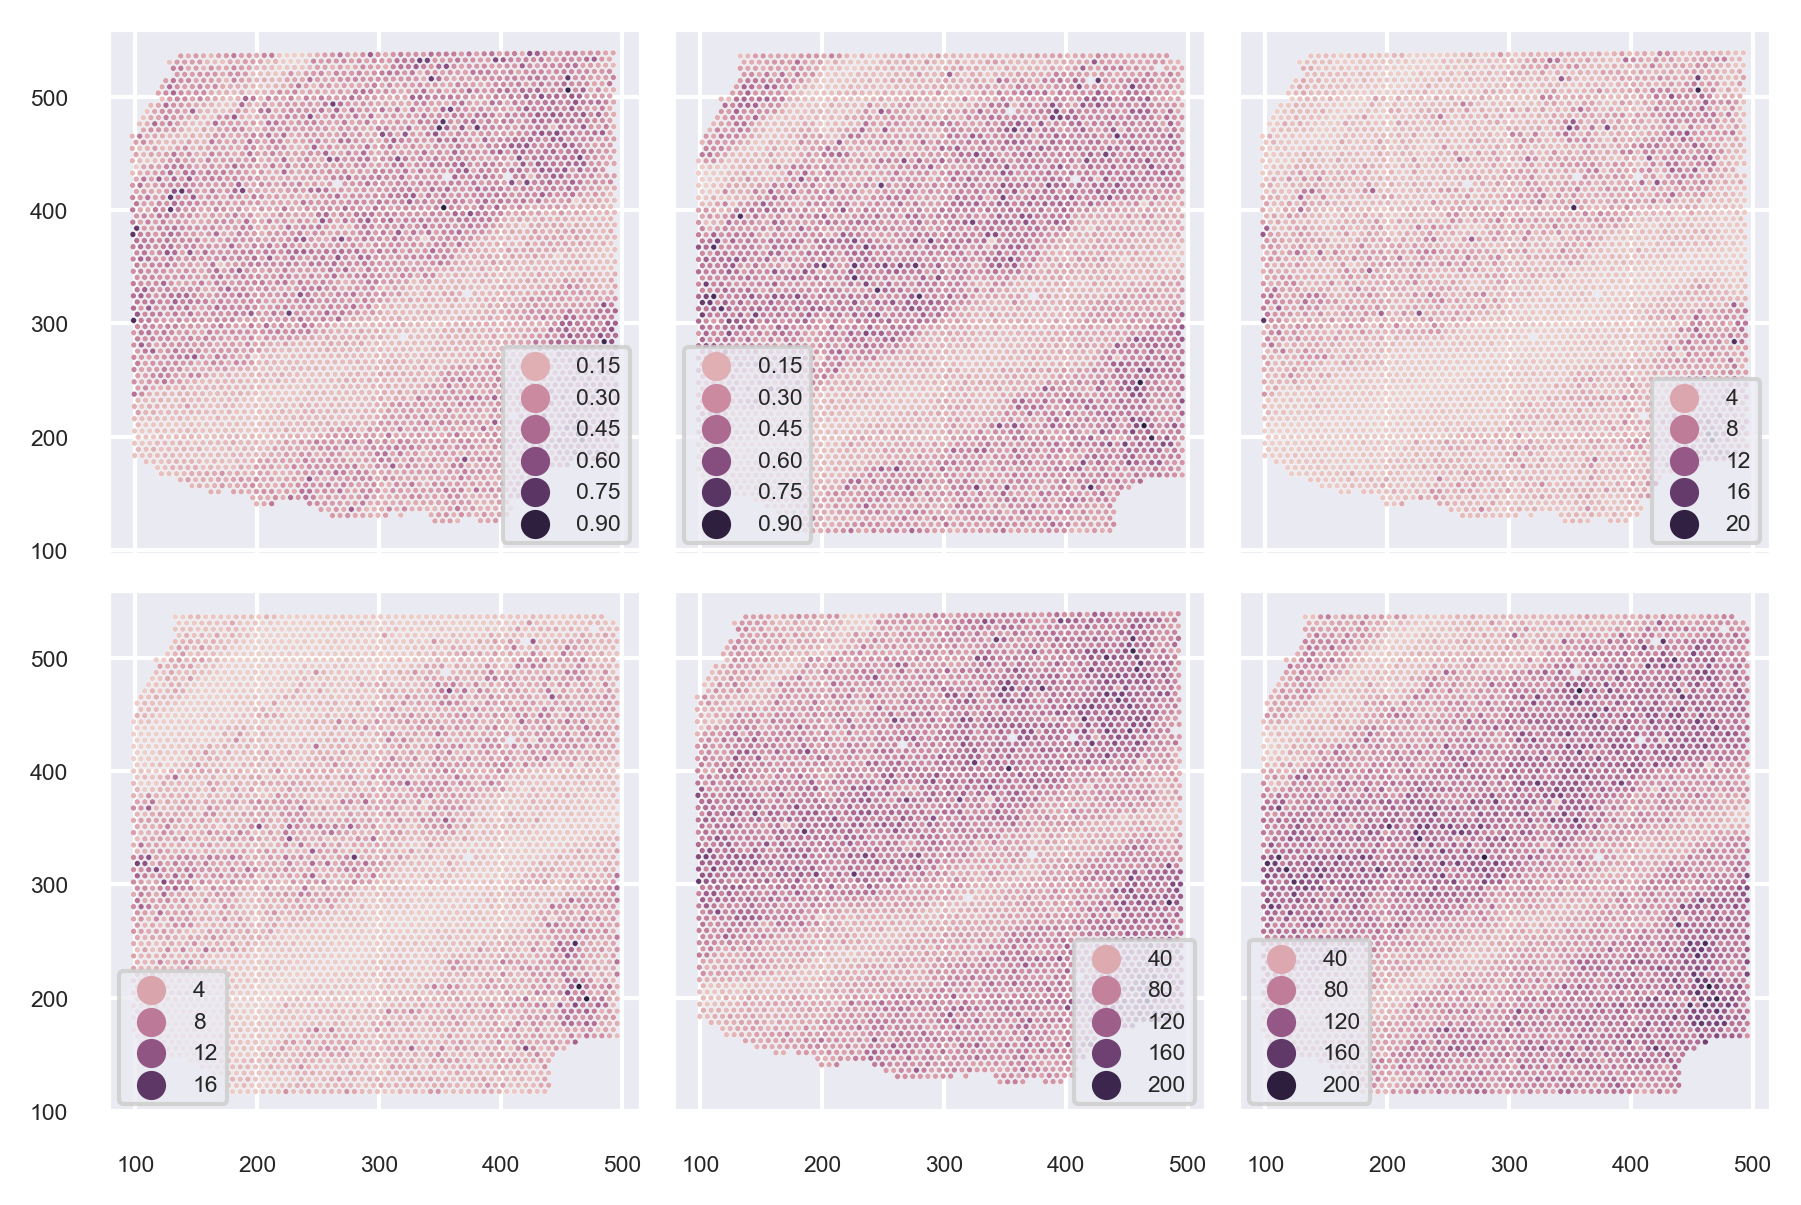

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(font_scale=0.5)
fig,ax = plt.subplots(2,3,figsize=[6,4],dpi=300,sharex=True,sharey=True)
spatial1 = slice1.obsm['spatial']
spatial2 = slice2.obsm['spatial']
sns.scatterplot(x=spatial1[:,0],y=spatial1[:,1],s=2,ax=ax[0][0],hue=np.mean(ann2feaMat(slice1),axis=1))
sns.scatterplot(x=spatial2[:,0],y=spatial2[:,1],s=2,ax=ax[0][1],hue=np.mean(ann2feaMat(slice2),axis=1))
sns.scatterplot(x=spatial1[:,0],y=spatial1[:,1],s=2,ax=ax[0][2],hue=np.var(ann2feaMat(slice1),axis=1))
sns.scatterplot(x=spatial2[:,0],y=spatial2[:,1],s=2,ax=ax[1][0],hue=np.var(ann2feaMat(slice2),axis=1))
sns.scatterplot(x=spatial1[:,0],y=spatial1[:,1],s=2,ax=ax[1][1],hue=np.max(ann2feaMat(slice1),axis=1)-np.min(ann2feaMat(slice1),axis=1))
sns.scatterplot(x=spatial2[:,0],y=spatial2[:,1],s=2,ax=ax[1][2],hue=np.max(ann2feaMat(slice2),axis=1)-np.min(ann2feaMat(slice2),axis=1))
plt.tight_layout()
plt.savefig('Overview')
#plt.show()

In [ ]:
fig,ax = plt.subplots(1,1,dpi=300,figsize=(5,5))
sns.set_style(style='white')

sns.scatterplot(x=spatial1[:,0],y=spatial1[:,1],s=7,hue=np.mean(ann2feaMat(slice1)+2,axis=1),ax=ax,legend=False)
ax.set_xlim([350,450])
ax.set_ylim([350,450])